In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
# %matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # 경고문자 무시
# geopy.distance 좌표 간 거리 계산
# import reverse_geocode # 좌표 -> 목적지 -----> 오류
from geopy.geocoders import Nominatim # 좌표 -> 목적지(api 가입 X)

In [2]:
df_pairs = pd.read_csv('./pairs.csv', encoding='UTF-8', nrows=10000)
# sample_submission = pd.read_csv('./test.csv', encoding='utf-8')
df_test = pd.read_csv('./test.csv', encoding='UTF-8')
df_train = pd.read_csv('./train.csv', encoding='UTF-8', nrows=10000)

##### df_train 보기

In [3]:
print(df_train.shape)
df_train.head()

(10000, 13)


,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,NaN,Bars,P_677e840bb6fc7e
1,E_000002eae2a589,Carioca Manero,-22.907225,-43.178244,NaN,NaN,NaN,NaN,BR,NaN,NaN,Brazilian Restaurants,P_d82910d8382a83
2,E_000007f24ebc95,ร้านตัดผมการาเกด,13.780813,100.484900,NaN,NaN,NaN,NaN,TH,NaN,NaN,Salons / Barbershops,P_b1066599e78477
3,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,NaN,Mobile Phone Shops,P_b2ed86905a4cd3
4,E_00001d92066153,Restaurante Casa Cofiño,43.338196,-4.326821,NaN,Caviedes,Cantabria,NaN,ES,NaN,NaN,Spanish Restaurants,P_809a884d4407fb


##### df_pairs 보기

In [4]:
print(df_pairs.shape)
df_pairs.head()

(10000, 25)


,id_1,name_1,latitude_1,longitude_1,address_1,city_1,state_1,zip_1,country_1,url_1,...,longitude_2,address_2,city_2,state_2,zip_2,country_2,url_2,phone_2,categories_2,match
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,...,3.635206,NaN,NaN,NaN,NaN,BE,NaN,NaN,Bars,True
1,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,...,27.845560,batı aydın,aydın,NaN,67500,TR,NaN,NaN,Electronics Stores,False
2,E_000023d8f4be44,Island Spa,14.518970,121.018702,"5th Flr, Newport Mall, Resorts World Manila",Pasay City,Metro Manila,NaN,PH,NaN,...,121.019827,NaN,NaN,NaN,NaN,PH,NaN,NaN,Spas,True
3,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,"1380 Holiday Ln., Ste. B",Fairfield,CA,94534,US,https://locations.togos.com/ll/US/CA/Fairfield...,...,-122.064606,NaN,Fairfield,CA,NaN,US,NaN,NaN,Sandwich Places,True
4,E_0000c362229d93,Coffee Cat,7.082218,125.610244,F. Torres St.,Davao City,Davao Region,8000,PH,NaN,...,125.611457,E. Jacinto Extension,Davao City,Davao Region,8000,PH,NaN,NaN,"Coffee Shops, Cafés, Dessert Shops",False


##### df_test 보기

In [5]:
print(df_test.shape)
print(df_test.head())

(5, 12)
                 id                                      name   latitude  \
0  E_00001118ad0191                   Jamu Petani Bagan Serai   5.012169   
1  E_000020eb6fed40                              Johnny's Bar  40.434209   
2  E_00002f98667edf                                      QIWI  47.215134   
3  E_001b6bad66eb98  Gelora Sriwijaya, Jaka Baring Sport City  -3.014675   
4  E_0283d9f61e569d                  Stadion Gelora Sriwijaya  -3.021727   

    longitude                       address            city          state  \
0  100.535805                           NaN             NaN            NaN   
1  -80.564160                 497 N 12th St         Weirton             WV   
2   39.686088             Межевая улица, 60  Ростов-на-Дону            NaN   
3  104.794374                           NaN             NaN            NaN   
4  104.788628  Jalan Gubernur Hasan Bastari       Palembang  South Sumatra   

       zip country               url         phone       categorie

#### 어느 나라의 location이 가장 높은가
- 미국

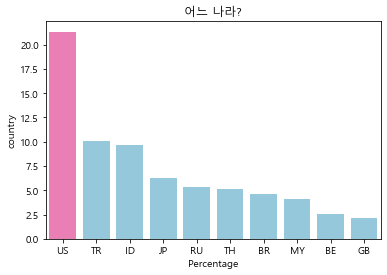

In [6]:
country = df_train['country'].value_counts()*100 / df_train['country'].value_counts().sum() # 비율로 보기
country = country.head(10) # 상위 10개까지만

plt.figure()
color = ['skyblue'] * len(country.index)
color[0] = 'hotpink'
sns.barplot(x=country.index, y=country.values, palette=color, saturation=0.7)
plt.xlabel('Percentage')
plt.ylabel('country')
plt.title('어느 나라?')
plt.show()


#### 미국 내 loaction이 높은 주?
- 캘리포니아

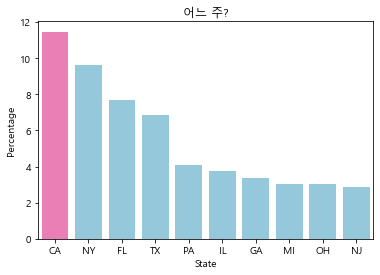

In [7]:
state = df_train[df_train['country']=='US']['state'].value_counts()*100 / df_train[df_train['country']=='US']['state'].value_counts().sum()
state = state.head(10)

plt.figure()
color=["skyblue"] * len(state.index)
color[0]="hotpink"
sns.barplot(x=state.index, y=state.values, palette=color, saturation=0.7)
plt.xlabel('State')
plt.ylabel('Percentage')
plt.title("어느 주?")
plt.show()

#### 어떤 카테고리?
- 주거용 건물(아파트/콘도)

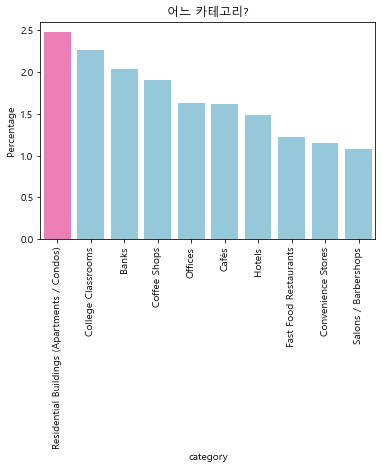

In [8]:
category = df_train['categories'].value_counts()*100 / df_train['categories'].value_counts().sum()
category = category.head(10)

plt.figure()
color = ["skyblue"] * len(category.index)
color[0] = "hotpink"
sns.barplot(x=category.index, y=category.values, palette=color, saturation=0.7)
plt.xticks(rotation=90)
plt.xlabel('category')
plt.ylabel('Percentage')
plt.title("어느 카테고리?")
plt.show()

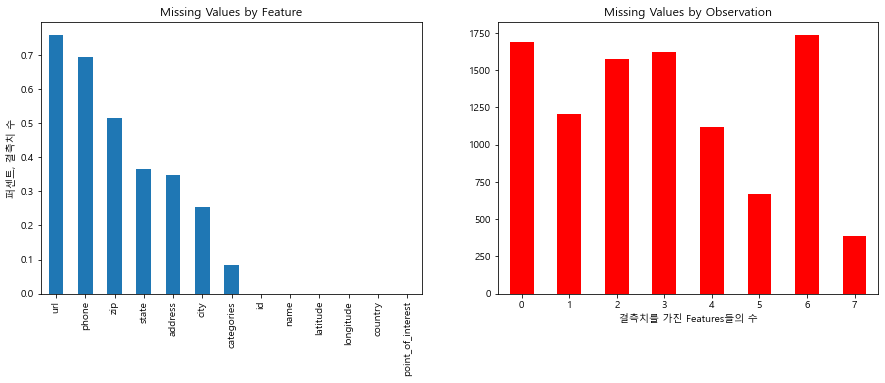

In [9]:


# 피쳐 별 잃어버린 값의 개수 그래프로
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
df_train.isna().mean().sort_values(ascending=False).plot(
    kind="bar", title="Missing Values by Feature", ax=axs[0]
)
axs[0].set_ylabel("퍼센트, 결측치 수")

# 각 행마다 잃어버린 값이 몇 개인지 카운트해보기
df_train.isna().sum(axis=1).value_counts().sort_index().plot(
    ax=axs[1], title="Missing Values by Observation", kind="bar", color='red'
)

axs[1].set_xlabel("결측치를 가진 Features들의 수")
axs[1].set_ylabel("")
plt.xticks(rotation=0)
plt.show()

## 데이터 전처리

In [10]:
# 소문자로
def Str_lower(df : pd.DataFrame):
    for c in df.columns:
        df[c] = df[c].fillna('').astype(str).apply(lambda x:x.lower())

Str_lower(df_train)
Str_lower(df_pairs)
Str_lower(df_test)

In [11]:
# 빈 칸을 결측치로
def Replace_missing(df : pd.DataFrame):
    for c in df.columns:
        df[c] =  df[c].replace('', np.nan)

Replace_missing(df_train)
Replace_missing(df_pairs)
Replace_missing(df_test)

In [12]:
# object를 category로 형변환
def OtC(df : pd.DataFrame):
    for c in df.columns:
        if df[c].dtype == 'O':
            df[c] = df[c].astype('category')

OtC(df_train)
OtC(df_pairs)
OtC(df_test)

In [13]:
df_train['lat_long_coords'] = df_train['latitude'].astype(str) + ', ' + df_train['longitude'].astype(str)
df_pairs['lat_long_coords_1'] = df_pairs['latitude_1'].astype(str) + ', ' + df_pairs['longitude_1'].astype(str)
df_pairs['lat_long_coords_2'] = df_pairs['latitude_2'].astype(str) + ', ' + df_pairs['longitude_2'].astype(str)

In [14]:
# 장소(좌표)별 국가
def geo_reverse_country(list): 
    geolocoder = Nominatim(user_agent = 'World', timeout=None)
    country_list=[]
    for i in list:
        
        address = geolocoder.reverse(i, zoom=1)
        country_list.append(address[0])
    return country_list


In [15]:
# df_train['country_code'] = df_train['lat_long_coords']

In [16]:
# geolocoder = Nominatim(user_agent = 'World', timeout=None)

# country_list=[]
# for j in df_train['lat_long_coords']:
#     country_list.append(geolocoder.reverse(j, zoom=1))
#     # country_list = pd.DataFrame(country_list)
#     df_train['country_code'] = pd.DataFrame(country_list)

# df_train
#     # df_pairs['country_code_1'] = geo_reverse_country(list(df_pairs['lat_long_coords_1']))
#     # df_pairs['country_code_2'] = geo_reverse_country(list(df_pairs['lat_long_coords_2']))

In [17]:
# 장소(좌표)별 도시
# def geo_reverse_city(list): 
#     geolocoder = Nominatim(user_agent = 'World', timeout=None)
#     city_list=[]
#     for i in list:
#         address = geolocoder.reverse(i, zoom=5)
#         city_list.append(address[1])
#     return city_list

In [18]:
# OtC(df_train)
# OtC(df_pairs)

# Str_lower(df_train)
# Str_lower(df_pairs)

### 분석

In [19]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.utils import all_estimators

In [20]:
df_pairs['match']= df_pairs['match'].cat.codes # Categorical 데이터를 Numerical 로 변환
df_pairs['categories_1']= df_pairs['categories_1'].cat.codes
df_pairs['categories_2']= df_pairs['categories_2'].cat.codes

Y = df_pairs[['latitude_1', 'longitude_1', 
'latitude_2', 'longitude_2', 'categories_1', 'categories_2', 'match']]

Y['latitude_1']= Y['latitude_1'].astype(np.float)
Y['longitude_1']= Y['longitude_1'].astype(np.float)
Y['latitude_2']= Y['latitude_2'].astype(np.float)
Y['longitude_2']= Y['longitude_2'].astype(np.float)

In [24]:
train_X, test_X = train_test_split(df_train, test_size=0.2, random_state=42)

train_y, test_y = train_test_split(Y, test_size=0.2, random_state=42)

In [25]:
# 적합한 모델 찾기
scores_list=[]
models = all_estimators(type_filter='classifier')

for name, model in models:
    try:
        # 모델 객체를 생성
        md = model()
        # 학습
        md.fit(train_X, train_y)
        # 평가
        model_score = md.score(test_X, test_y)
        scores_list.append((name, np.round(model_score, 4)))
    except:
        pass

scores_list

[]

In [23]:
train_X = np.array(train_X)
train_y = np.array(train_y)

# 모델 생성
forest_model = RandomForestClassifier(max_depth=5, oob_score=True)
forest_model.fit(train_X, train_y)
# 모델 평가
print('train score : ', forest_model.score(train_X, train_y))
print('test score : ', forest_model.score(test_X, test_y))
print('oob_score_ : ', forest_model.oob_score_)

ValueError: could not convert string to float: 'e_02199551048c36'

In [ ]:
# 교차 검증 후 평가점수 확인
result = cross_validate(forest_model, df_train, X, return_train_score=True, cv=3)
print(result)
print(result['test_score'].mean())